In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# TRADING STRATEGY - MACD

In [4]:
b = pd.read_excel(r'C:\Users\Sandhyana\Desktop\brent.xls', sheet_name='Data 1')
b=b[b['Date']>'2010-12-31']


In [5]:
b['Date'] = pd.to_datetime(b['Date'])
b.set_index('Date', inplace=True)
b

,brentprices
Date,
2011-01-03,95.82
2011-01-04,93.52
2011-01-05,95.07
2011-01-06,94.95
2011-01-07,94.25
...,...
2019-12-24,69.26
2019-12-26,69.26
2019-12-27,68.91


In [6]:
b1 = b.resample('D').ffill().reset_index()
b1

,Date,brentprices
0,2011-01-03,95.82
1,2011-01-04,93.52
2,2011-01-05,95.07
3,2011-01-06,94.95
4,2011-01-07,94.25
...,...,...
3280,2019-12-27,68.91
3281,2019-12-28,68.91
3282,2019-12-29,68.91
3283,2019-12-30,68.30


In [8]:
w = pd.read_excel(r'C:\Users\Sandhyana\Desktop\WTI.xls', sheet_name='Data 1')
w=w[w['Date']>'2010-12-31']
w

,Date,wtiprices
5962,2011-01-03,91.59
5963,2011-01-04,89.39
5964,2011-01-05,90.30
5965,2011-01-06,88.37
5966,2011-01-07,88.07
...,...,...
8218,2019-12-24,61.17
8219,2019-12-26,61.72
8220,2019-12-27,61.76
8221,2019-12-30,61.66


In [9]:
w['Date'] = pd.to_datetime(w['Date'])
w.set_index('Date', inplace=True)

In [10]:
w1 = w.resample('D').ffill().reset_index()
w1

,Date,wtiprices
0,2011-01-03,91.59
1,2011-01-04,89.39
2,2011-01-05,90.30
3,2011-01-06,88.37
4,2011-01-07,88.07
...,...,...
3280,2019-12-27,61.76
3281,2019-12-28,61.76
3282,2019-12-29,61.76
3283,2019-12-30,61.66


In [11]:
price=[b1['Date'],b1['brentprices'],w1['wtiprices']]
finalprice= pd.concat(price,axis=1)
finalprice

,Date,brentprices,wtiprices
0,2011-01-03,95.82,91.59
1,2011-01-04,93.52,89.39
2,2011-01-05,95.07,90.30
3,2011-01-06,94.95,88.37
4,2011-01-07,94.25,88.07
...,...,...,...
3280,2019-12-27,68.91,61.76
3281,2019-12-28,68.91,61.76
3282,2019-12-29,68.91,61.76
3283,2019-12-30,68.30,61.66


In [14]:
finalprice['diff']=finalprice['brentprices']-finalprice['wtiprices']
finalprice

,Date,brentprices,wtiprices,diff
0,2011-01-03,95.82,91.59,4.23
1,2011-01-04,93.52,89.39,4.13
2,2011-01-05,95.07,90.30,4.77
3,2011-01-06,94.95,88.37,6.58
4,2011-01-07,94.25,88.07,6.18
...,...,...,...,...
3280,2019-12-27,68.91,61.76,7.15
3281,2019-12-28,68.91,61.76,7.15
3282,2019-12-29,68.91,61.76,7.15
3283,2019-12-30,68.30,61.66,6.64


In [15]:
finalprice['diff'].sum()

25977.11

In [71]:
#windows
short_window=180
long_window=600

signals=pd.DataFrame(index=finalprice.index)
signals['signal']=0.0

In [72]:
signals

,signal
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3280,0.0
3281,0.0
3282,0.0
3283,0.0


In [73]:
#SMA of short window
signals['short_mavg']=finalprice['diff'].rolling(window=short_window,min_periods=1,center=False).mean()

#SMA of long window
signals['long_mavg']=finalprice['diff'].rolling(window=long_window,min_periods=1,center=False).mean()

#create signals
signals['signal'][short_window:]=np.where(signals['short_mavg'][short_window:]>signals['long_mavg'][short_window:],1.0,0.0)

In [74]:
#generate trading orders
signals['positions']=signals['signal'].diff()
print(signals)

      signal  short_mavg  long_mavg  positions
0        0.0    4.230000   4.230000        NaN
1        0.0    4.180000   4.180000        0.0
2        0.0    4.376667   4.376667        0.0
3        0.0    4.927500   4.927500        0.0
4        0.0    5.178000   5.178000        0.0
...      ...         ...        ...        ...
3280     0.0    5.997111   7.178850        0.0
3281     0.0    6.002444   7.184083        0.0
3282     0.0    6.004833   7.187117        0.0
3283     0.0    6.005778   7.187450        0.0
3284     0.0    6.006167   7.188117        0.0

[3285 rows x 4 columns]


In [75]:
signals.to_csv(r'C:\Users\Sandhyana\Desktop\signals.csv')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Sandhyana\\Desktop\\signals.csv'

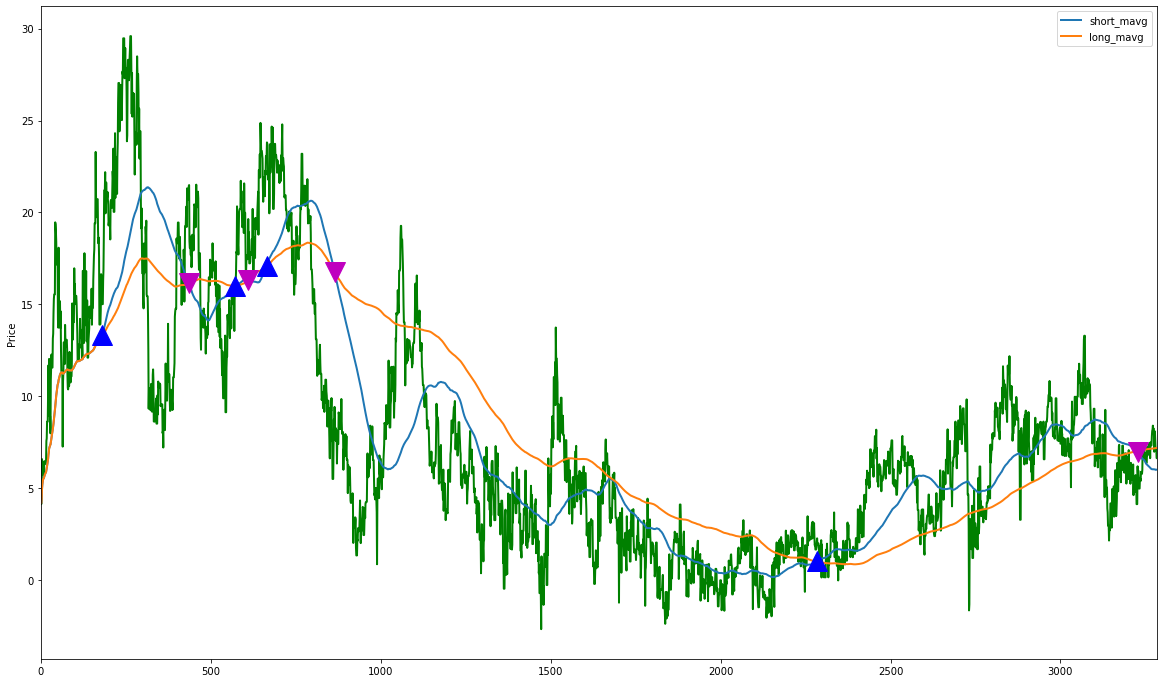

In [76]:
import matplotlib.pyplot as plt

#initialise plot figure
fig=plt.figure(figsize=(20,12))
ax1=fig.add_subplot(111, ylabel='Price')
finalprice['diff'].plot(ax=ax1, color='g',lw=2)
signals[['short_mavg','long_mavg']].plot(ax=ax1, lw=2)

#buy signals
ax1.plot(signals.loc[signals.positions==1.0].index, signals.short_mavg[signals.positions==1.0],'^' , markersize=20, color='b')

#sell signals
ax1.plot(signals.loc[signals.positions==-1.0].index,signals.short_mavg[signals.positions==-1.0],'v',markersize=20,color='m')
plt.show()

In [77]:
#backtesting

initial_capital = float(100000)

#dataframe of positions
positions=pd.DataFrame(index=signals.index).fillna(0.0)

#initial position
positions['Position in USD']=100*signals['signal']

#initialising portfolio
portfolio= positions.multiply(finalprice['diff'], axis=0)

#store difference in shares owned
pos_diff=positions.diff()

#add holdings to portfolio
portfolio['holdings']=(positions.multiply(finalprice['diff'],axis=0)).sum(axis=1)

#add cash to portfolio
portfolio['cash']=initial_capital-(pos_diff.multiply(finalprice['diff'],axis=0)).sum(axis=1).cumsum()

#add total to portfolio
portfolio['total']=portfolio['cash']+portfolio['holdings']

#add returns to portfolio
portfolio['returns']=portfolio['total'].pct_change()

del portfolio['Position in USD']

print(portfolio)


      holdings      cash     total  returns
0          0.0  100000.0  100000.0      NaN
1          0.0  100000.0  100000.0      0.0
2          0.0  100000.0  100000.0      0.0
3          0.0  100000.0  100000.0      0.0
4          0.0  100000.0  100000.0      0.0
...        ...       ...       ...      ...
3280       0.0  100023.0  100023.0      0.0
3281       0.0  100023.0  100023.0      0.0
3282       0.0  100023.0  100023.0      0.0
3283       0.0  100023.0  100023.0      0.0
3284       0.0  100023.0  100023.0      0.0

[3285 rows x 4 columns]


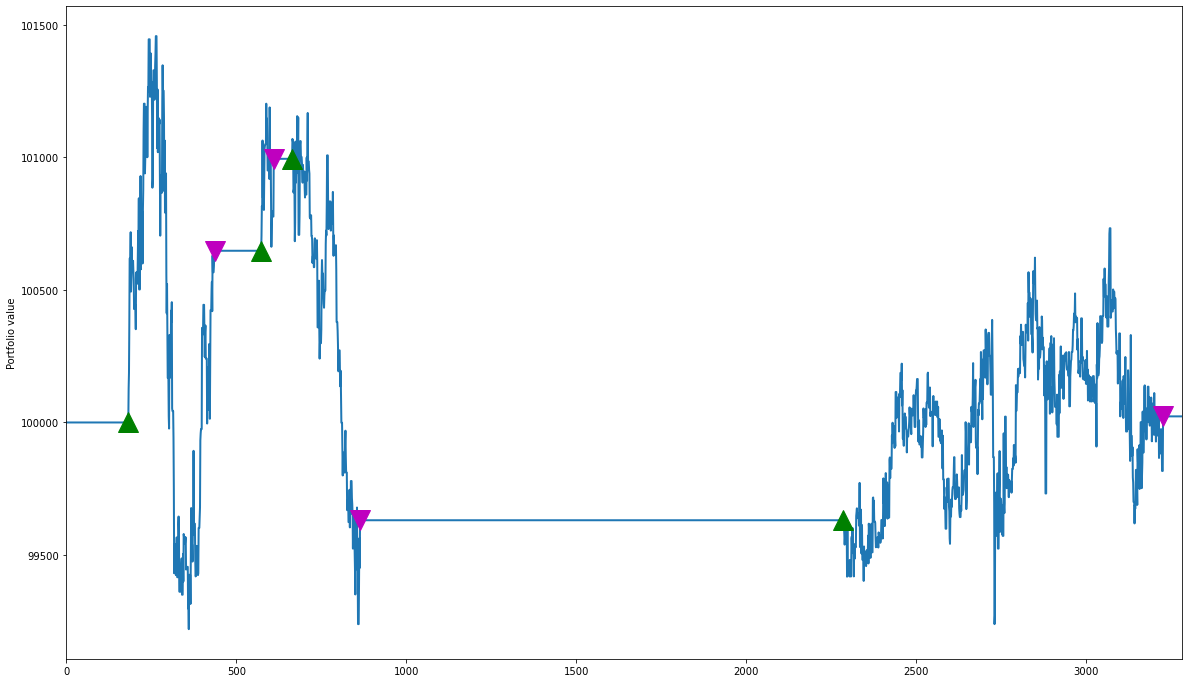

In [78]:
#plot
fig=plt.figure(figsize=(20,12))
ax1=fig.add_subplot(111, ylabel='Portfolio value')

portfolio['total'].plot(ax=ax1, lw=2)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, portfolio.total[signals.positions ==1.0],'^', markersize=20, color='g')
ax1.plot(portfolio.loc[signals.positions==-1.0].index, portfolio.total[signals.positions ==-1.0],'v',markersize=20, color='m')
plt.show()

In [79]:
# absolute return
print(portfolio['total'].tail(1))

print((((portfolio['total'].tail(1)/float(100000))-float(1))*100))

3284    100023.0
Name: total, dtype: float64
3284    0.023
Name: total, dtype: float64
